## Stroop analysis

Linguistics students from Aarhus University took part in a Stroop experiment with four condition:

1. Naming with interference
2. Naming with no interference
3. Reading with interference
4. Reading with no interference

The naming with interference (in which participants were supposed to name the color and ignore the word) task looked liked this:
<img src="https://github.com/ethanweed/LaCoBra/blob/master/images/Stroop2_naming_int.png?raw=true" width="400"/>

Use repeated-measures ANOVA to analyze the data, looking for both main effects and interactions.


In [50]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/Stroop/refs/heads/master/Stroop-raw-over-the-years.csv')

In [52]:
df

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,4.16,6.76,4.45,4.65,2015
1,4.35,7.73,4.78,4.46,2015
2,3.60,7.00,4.00,3.50,2015
3,3.90,9.03,4.60,6.30,2015
4,4.22,9.98,6.83,6.24,2015
...,...,...,...,...,...
177,4.30,7.08,6.25,4.28,2021
178,4.75,9.66,6.12,5.49,2021
179,4.98,7.52,6.73,5.16,2021
180,5.16,8.81,8.19,5.51,2021


In [53]:
df['ID'] = range(1, len(df) + 1)
df

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year,ID
0,4.16,6.76,4.45,4.65,2015,1
1,4.35,7.73,4.78,4.46,2015,2
2,3.60,7.00,4.00,3.50,2015,3
3,3.90,9.03,4.60,6.30,2015,4
4,4.22,9.98,6.83,6.24,2015,5
...,...,...,...,...,...,...
177,4.30,7.08,6.25,4.28,2021,178
178,4.75,9.66,6.12,5.49,2021,179
179,4.98,7.52,6.73,5.16,2021,180
180,5.16,8.81,8.19,5.51,2021,181


In [54]:
df_reading = df[['Reading_Int', 'Reading_NoInt', 'Year', 'ID']]
df_reading.columns = ['Int', 'NoInt', 'Year', 'ID']

df_reading['Task'] = 'Reading'
df_reading

,Int,NoInt,Year,ID,Task
0,4.65,4.16,2015,1,Reading
1,4.46,4.35,2015,2,Reading
2,3.50,3.60,2015,3,Reading
3,6.30,3.90,2015,4,Reading
4,6.24,4.22,2015,5,Reading
...,...,...,...,...,...
177,4.28,4.30,2021,178,Reading
178,5.49,4.75,2021,179,Reading
179,5.16,4.98,2021,180,Reading
180,5.51,5.16,2021,181,Reading


In [55]:
df_naming = df[['Naming_Int', 'Naming_NoInt', 'Year', 'ID']]
df_naming.columns = ['Int', 'NoInt', 'Year', 'ID']
df_naming['Task'] = 'Naming'

In [56]:
d = pd.concat([df_reading, df_naming])
d = d.melt(id_vars=['ID', 'Year', 'Task'], var_name='Condition', value_name='Time')
d

,ID,Year,Task,Condition,Time
0,1,2015,Reading,Int,4.65
1,2,2015,Reading,Int,4.46
2,3,2015,Reading,Int,3.50
3,4,2015,Reading,Int,6.30
4,5,2015,Reading,Int,6.24
...,...,...,...,...,...
723,178,2021,Naming,NoInt,6.25
724,179,2021,Naming,NoInt,6.12
725,180,2021,Naming,NoInt,6.73
726,181,2021,Naming,NoInt,8.19


In [64]:
pg.rm_anova(data=d, dv='Time', within=['Condition', 'Task'], subject='ID')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition,1041.180198,1,181,1041.180198,435.813833,4.548957e-50,4.548957e-50,0.280839,1.0
1,Task,1225.073605,1,181,1225.073605,376.307876,4.517934e-46,4.517934e-46,0.314825,1.0
2,Condition * Task,256.375385,1,181,256.375385,105.939706,7.494781e-20,7.494781e-20,0.087722,1.0


<Axes: xlabel='Task', ylabel='Time'>

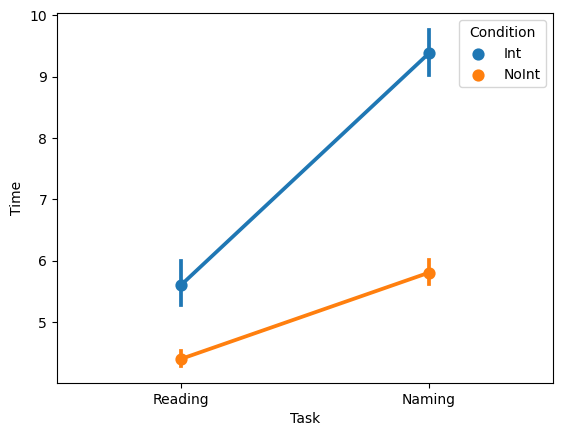

In [62]:
sns.pointplot(data=d, x='Task', y='Time', hue='Condition')